In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [34]:
import numpy as np
import pandas as pd

## 엑셀파일 불러오기

```python
import pandas as pd
df = pd.read_excel('excel_file.xlsx'[,sheet name=number 혹은 '시트이름' , index_col=number 혹은 '열이름'])

```

- 주의할점

    - 열의 머리글 (header ) 은 한 줄로 만들고 데이터는 그 아래에 입력한다.
    
    - 열 머리글이나 데이터 입력 부분에 셀 병합 기능은 이용하지 않는다.
    
    - 데이터를 입력할 때 하나의 셀에 숫자와 단위를 같이 쓰지 않는다.
    
    - 하나의 열에 입력한 값의 데이터 형식은 모두 일치해야한다. 즉, 하나의 열에 문자열 , 숫자 , 날짜 혼합해서 사용 X
    
    - 데이터를 연도 , 분기 , 월 , 업체별 , 제품별 등의 시트로 나누지 않는다. 시트는 통합해라 

In [8]:
df = pd.read_excel('Cobb_Douglass.xlsx' , index_col =0)

df.head()
df.tail()

,output,labor,capital,lnoutput,lnlabor,lncapital,lnoutlab,lncaplab,outputstar,capitalstar,laborstar
obs,,,,,,,,,,,
1,38372840,424471,2689076,17.46286,12.958600,14.80471,4.504261,1.846109,-0.107987,0.063689,0.134389
2,1805427,19895,57997,14.40631,9.898224,10.96815,4.508084,1.069923,-0.923066,-0.905514,-0.941053
3,23736129,206893,2308272,16.98251,12.239960,14.65201,4.742552,2.412053,-0.434236,-0.076587,-0.443976
4,26981983,304055,1376235,17.11068,12.624960,14.13486,4.485716,1.509898,-0.361887,-0.419918,-0.185700
5,217546032,1809756,13554116,19.19792,14.408700,16.42220,4.789218,2.013498,3.885739,4.066012,3.816748


,output,labor,capital,lnoutput,lnlabor,lncapital,lnoutlab,lncaplab,outputstar,capitalstar,laborstar
obs,,,,,,,,,,,
47,49166991,425346,2731669,17.71073,12.960660,14.82042,4.750075,1.859765,0.132612,0.079379,0.136715
48,46164427,313279,1945860,17.64772,12.654850,14.48121,4.992871,1.826365,0.065685,-0.210087,-0.161181
49,9185967,89639,685587,16.03319,11.403550,13.43803,4.629642,2.034485,-0.758556,-0.674331,-0.755660
50,66964978,694628,3902823,18.01968,13.451130,15.17721,4.568549,1.726079,0.529324,0.510793,0.852519
51,2979475,15221,361536,14.90726,9.630431,12.79812,5.276826,3.167686,-0.896897,-0.793700,-0.953478


In [10]:
df.columns

Index(['output', 'labor', 'capital', 'lnoutput', 'lnlabor', 'lncapital',
       'lnoutlab', 'lncaplab', 'outputstar', 'capitalstar', 'laborstar'],
      dtype='object')

In [14]:
df_origin = df[['output','labor','capital']] # output , 노동 , 자본 만 가져오기 

In [21]:
df_origin.describe(include='all').round(2).T

,count,mean,std,min,25%,50%,75%,max
output,51.0,43217548.18,44863660.89,159921.0,9850054.0,28972772.0,57063308.0,217546032.0
labor,51.0,373914.51,376194.98,2029.0,78717.5,257820.0,463882.0,1809756.0
capital,51.0,2516180.86,2714683.37,7188.0,514911.5,1790751.0,3417765.5,13554116.0


In [20]:
df_log = df[['lnoutput','lnlabor','lncapital']] # 로그 씌운 output , 노동 , 자본 
df_log.describe(include='all').round(2).T

,count,mean,std,min,25%,50%,75%,max
lnoutput,51.0,16.94,1.38,11.98,16.10,17.18,17.85,19.20
lnlabor,51.0,12.19,1.37,7.62,11.27,12.46,13.05,14.41
lncapital,51.0,14.09,1.40,8.88,13.15,14.40,15.04,16.42


In [29]:
# 정제한 데이터를 CSV file 로 저장하기 

df_basic = df_log.describe(include='all').round(2).T
df_basic.to_csv('basic.csv')

In [32]:
# 상관계수

df_log_corr = df_log.corr()
df_log_corr
df_log_corr.to_csv('log_corr.csv')

,lnoutput,lnlabor,lncapital
lnoutput,1.000000,0.970861,0.973369
lnlabor,0.970861,1.000000,0.960402
lncapital,0.973369,0.960402,1.000000


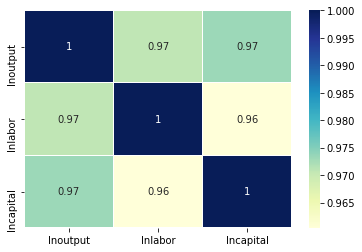

In [36]:
# 시각화 

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

sn.heatmap( df_log_corr , annot=True , cmap='YlGnBu' , linewidths=0.1)
plt.show()

## Simple Linear Regression (  콥 더글라스 )

    - 로그를 씌워 탄력성을 찾는다 ( 탄력성 = B1 , B2 ) 

In [39]:
%matplotlib inline
import statsmodels.api as sm # 회귀모형 보여주는 모듈

In [49]:
# df 에 const 열을 생성에서 1 로 채우기 
df['const']=1

# 독립변수 , 종속변수 선정하고 보여주기 

X  = ['const','lnlabor','lncapital']

# OLS 값 만들기 
reg=sm.OLS(df['lnoutput'],df[X] , missing='drop').fit() # OLS( 종속변수 , 독립변수 들 , missing= drop 없는부분 생략하라)


In [50]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               lnoutput   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     645.9
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           2.00e-35
Time:                        20:11:20   Log-Likelihood:                -3.4267
No. Observations:                  51   AIC:                             12.85
Df Residuals:                      48   BIC:                             18.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8876      0.396      9.812      0.0